### The purpose of this project is to read the data that was scraped from the rightmove website and determine the average prices of the various kinds of properties that are currently on the market.

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

In [2]:
csv = 'cambridge-for-sale.csv'

In [3]:
housing = pd.read_csv(
            csv, 
            encoding='Latin-1', # for the '£' sign in 'price'
            header=0,
            skip_blank_lines=True
        )

In [4]:
housing.head()

,title,address,price,seller
0,Studio apartment for sale,"Eddington Avenue,\r\r\nCambridge,\r\r\nCB3","£354,950",Hill Residential Limited
1,6 bedroom detached house for sale,"Adams Road, Cambridge","£6,500,000","Bidwells, Cambridge"
2,21 bedroom terraced house for sale,"Milton Road, Cambridge","£4,800,000","haart, Cambridge"
3,5 bedroom semi-detached house for sale,"Lyndewode Road, Cambridge, Cambridgeshire","£3,500,000","The Modern House, London"
4,4 bedroom detached house for sale,"Barrow Road, Cambridge","£2,500,000","Bidwells, Cambridge"


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    475 non-null    object
 1   address  455 non-null    object
 2   price    455 non-null    object
 3   seller   455 non-null    object
dtypes: object(4)
memory usage: 15.0+ KB


### Data Cleaning 1: Drop rows with no accurate information.

In [6]:
housing.isna().sum()

title       0
address    20
price      20
seller     20
dtype: int64

In [7]:
housing[housing['address'].isna()]

,title,address,price,seller
455,Property,NaN,NaN,NaN
456,Property,NaN,NaN,NaN
457,Property,NaN,NaN,NaN
458,Property,NaN,NaN,NaN
459,Property,NaN,NaN,NaN
460,Property,NaN,NaN,NaN
461,Property,NaN,NaN,NaN
462,Property,NaN,NaN,NaN
463,Property,NaN,NaN,NaN
464,Property,NaN,NaN,NaN


**It appears that properties starting at row 455 have no accurate information. We'll get rid of them.**

In [8]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    455 non-null    object
 1   address  455 non-null    object
 2   price    455 non-null    object
 3   seller   455 non-null    object
dtypes: object(4)
memory usage: 17.8+ KB


### Data Cleaning 2: Extract 'type of property' from  'title'

In [9]:
housing['title'].unique()

array(['Studio apartment for sale', '6 bedroom detached house for sale',
       '21 bedroom terraced house for sale',
       '5 bedroom semi-detached house for sale',
       '4 bedroom detached house for sale',
       '4 bedroom semi-detached house for sale',
       '5 bedroom house for sale', '5 bedroom detached house for sale',
       '5 bedroom end of terrace house for sale',
       '5 bedroom terraced house for sale',
       '5 bedroom town house for sale',
       '3 bedroom semi-detached house for sale',
       '4 bedroom terraced house for sale',
       '4 bedroom town house for sale',
       '2 bedroom terraced house for sale',
       '4 bedroom end of terrace house for sale',
       '3 bedroom end of terrace house for sale',
       '3 bedroom apartment for sale',
       '8 bedroom terraced house for sale',
       '2 bedroom apartment for sale',
       '3 bedroom terraced house for sale',
       '3 bedroom detached house for sale', 'Plot for sale',
       '2 bedroom town house f

In [10]:
housing['info'] = housing['title'].str.replace(' for sale','')

In [11]:
housing['info'].value_counts()

2 bedroom apartment                 74
1 bedroom apartment                 47
3 bedroom terraced house            35
2 bedroom terraced house            28
2 bedroom flat                      27
1 bedroom flat                      22
3 bedroom semi-detached house       22
4 bedroom detached house            20
3 bedroom end of terrace house      19
4 bedroom terraced house            16
3 bedroom detached house            12
4 bedroom end of terrace house      10
4 bedroom semi-detached house        9
3 bedroom apartment                  9
Studio apartment                     8
4 bedroom town house                 8
5 bedroom detached house             8
Studio flat                          6
5 bedroom semi-detached house        6
1 bedroom retirement property        6
5 bedroom terraced house             5
2 bedroom semi-detached house        5
5 bedroom house                      4
5 bedroom town house                 4
1 bedroom detached house             3
2 bedroom maisonette     

**We will also take "Land" and "Plot" out of the dataset.**

In [12]:
housing[housing['title'].str.contains('Land')]

,title,address,price,seller,info
453,Land for sale,"Land Leading to 60-68 Malvern Road, Cambridge,...","£10,000","Auction House London, Hampstead",Land
454,Land for sale,"Land leading to 44-58 Malvern Road, Cambridge,...","£5,000","McHugh & Co, London",Land


In [13]:
housing[housing['title'].str.contains('Plot')]

,title,address,price,seller,info
71,Plot for sale,"80 Campkin Road, Cambridge","£750,000","Bidwells, Cambridge New Homes",Plot
118,Plot for sale,"Pearce Close, Cambridge, Cambridgeshire","£600,000","Bidwells, Cambridge",Plot


In [14]:
housing = housing.drop([71, 118, 453,454])

In [15]:
housing['info'].value_counts()

2 bedroom apartment                 74
1 bedroom apartment                 47
3 bedroom terraced house            35
2 bedroom terraced house            28
2 bedroom flat                      27
1 bedroom flat                      22
3 bedroom semi-detached house       22
4 bedroom detached house            20
3 bedroom end of terrace house      19
4 bedroom terraced house            16
3 bedroom detached house            12
4 bedroom end of terrace house      10
4 bedroom semi-detached house        9
3 bedroom apartment                  9
Studio apartment                     8
4 bedroom town house                 8
5 bedroom detached house             8
Studio flat                          6
5 bedroom semi-detached house        6
1 bedroom retirement property        6
5 bedroom terraced house             5
2 bedroom semi-detached house        5
5 bedroom town house                 4
5 bedroom house                      4
2 bedroom maisonette                 3
1 bedroom detached house 

**We will now adjust the wording of 'studio apartment' and 'studio flat' to '1 bedroom flat'**

In [16]:
mapping_dict = {
    'Studio apartment': '1 bedroom flat',
    'Studio flat': '1 bedroom flat',
    }

housing = housing.replace({'info': mapping_dict})

housing['info'].unique()

array(['1 bedroom flat', '6 bedroom detached house',
       '21 bedroom terraced house', '5 bedroom semi-detached house',
       '4 bedroom detached house', '4 bedroom semi-detached house',
       '5 bedroom house', '5 bedroom detached house',
       '5 bedroom end of terrace house', '5 bedroom terraced house',
       '5 bedroom town house', '3 bedroom semi-detached house',
       '4 bedroom terraced house', '4 bedroom town house',
       '2 bedroom terraced house', '4 bedroom end of terrace house',
       '3 bedroom end of terrace house', '3 bedroom apartment',
       '8 bedroom terraced house', '2 bedroom apartment',
       '3 bedroom terraced house', '3 bedroom detached house',
       '2 bedroom town house', '4 bedroom house',
       '7 bedroom semi-detached house', '2 bedroom flat',
       '2 bedroom semi-detached house', '2 bedroom maisonette',
       '6 bedroom semi-detached house',
       '2 bedroom semi-detached bungalow', '3 bedroom cottage',
       '2 bedroom detached house',

**The number of bedrooms can now be split from the type of property.**

In [17]:
housing['no_of_bedrooms'] = housing['info'].str.split('bedroom').str[0]
housing['no_of_bedrooms']

0       1 
1       6 
2      21 
3       5 
4       4 
      ... 
448     1 
449     1 
450     2 
451     1 
452     1 
Name: no_of_bedrooms, Length: 451, dtype: object

In [18]:
housing['property_type'] = housing['info'].str.split('bedroom').str[1].str.strip()
housing['property_type'].value_counts()

apartment                 130
terraced house             89
flat                       64
detached house             46
semi-detached house        45
end of terrace house       34
town house                 13
retirement property         8
house                       6
maisonette                  6
ground floor flat           4
semi-detached bungalow      2
cottage                     1
duplex                      1
ground maisonette           1
house share                 1
Name: property_type, dtype: int64

#### 4 main types of property will be formed for our analysis.
* Flats
* Detached
* Semi-detached
* Terraced  

**We will unify the various terms of flat in British English as 'flat'.**


In [19]:
mapping_dict = {'apartment': 'flat',
              'duplex': 'flat',
              'ground floor flat': 'flat',
              'ground maisonette': 'flat',
              'maisonette': 'flat',
              'retirement property': 'flat',
              'flat': 'flat'
}

housing = housing.replace({'property_type': mapping_dict})
housing['property_type'].value_counts()

flat                      214
terraced house             89
detached house             46
semi-detached house        45
end of terrace house       34
town house                 13
house                       6
semi-detached bungalow      2
cottage                     1
house share                 1
Name: property_type, dtype: int64

**'Cottages' and 'bungalows' will be categorised as 'detached houses'.**

In [20]:
mapping_dict = {'cottage': 'detached house',
              'semi-detached bungalow': 'detached house',
}

housing = housing.replace({'property_type': mapping_dict})
housing['property_type'].value_counts()

flat                    214
terraced house           89
detached house           49
semi-detached house      45
end of terrace house     34
town house               13
house                     6
house share               1
Name: property_type, dtype: int64

In [21]:
housing[housing['property_type'] == 'house']

,title,address,price,seller,info,no_of_bedrooms,property_type
6,5 bedroom house for sale,"Athena At Knights Park, Eddington Avenue, Camb...","£1,999,950","Bidwells, Cambridge New Homes",5 bedroom house,5,house
52,5 bedroom house for sale,"Trumpington Meadows, Hauxton Road, Trumpington","£909,995","Bidwells, Cambridge New Homes",5 bedroom house,5,house
53,5 bedroom house for sale,"Chesterton Road, Cambridge, CB4","£900,000","Malcolms, Great Cambourne",5 bedroom house,5,house
59,5 bedroom house for sale,"Trumpington Meadows, Hauxton Road, Trumpington","£804,995","Bidwells, Cambridge New Homes",5 bedroom house,5,house
76,4 bedroom house for sale,"Trumpington Meadows, Hauxton Road, Trumpington","£749,995","Bidwells, Cambridge New Homes",4 bedroom house,4,house
77,4 bedroom house for sale,"Trumpington Meadows, Hauxton Road, Trumpington","£749,995","Bidwells, Cambridge New Homes",4 bedroom house,4,house


**Some terrace houses have been categoried as 'House'.**

**'end of terrace house', 'town house' and 'house' will be categorized as 'terraced house'**


In [22]:
mapping_dict = {'end of terrace house': 'terraced house',
                'town house': 'terraced house',
                'house': 'terraced house',
}

housing = housing.replace({'property_type': mapping_dict})
housing['property_type'].value_counts()

flat                   214
terraced house         142
detached house          49
semi-detached house     45
house share              1
Name: property_type, dtype: int64

<b>Finally, drop the 'house share' property</b>

In [23]:
index = housing[housing['property_type'] == 'house share'].index

housing.drop(index, inplace=True, axis=0)

housing['property_type'].value_counts()

flat                   214
terraced house         142
detached house          49
semi-detached house     45
Name: property_type, dtype: int64

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 452
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           450 non-null    object
 1   address         450 non-null    object
 2   price           450 non-null    object
 3   seller          450 non-null    object
 4   info            450 non-null    object
 5   no_of_bedrooms  450 non-null    object
 6   property_type   450 non-null    object
dtypes: object(7)
memory usage: 28.1+ KB


<b>Convert 'price' column to 'integer'</b>

In [25]:
housing['price'].unique()

array(['£354,950', '£6,500,000', '£4,800,000', '£3,500,000', '£2,500,000',
       '£1,999,950', '£1,850,000', '£1,800,000', '£1,750,000',
       '£1,695,000', '£1,600,000', '£1,595,000', '£1,550,000',
       '£1,450,000', '£1,400,000', '£1,350,000', '£1,300,000', '£495,000',
       '£1,250,000', '£1,150,000', '£1,100,000', '£1,000,000', '£995,000',
       '£975,000', '£950,000', '£914,995', '£424,995', '£909,995',
       '£900,000', '£895,000', '£875,000', '£850,000', '£804,995',
       '£800,000', '£799,995', '£795,000', '£775,000', '£760,000',
       '£752,995', '£750,000', '£749,995', '£575,000', '£725,000',
       '£715,000', '£709,950', '£700,000', 'Coming Soon', '£685,000',
       '£675,000', '£600,000', '£650,000', '£627,000', '£625,000',
       '£525,000', '£599,995', '£595,000', '£585,000', '£565,000',
       '£560,000', '£550,000', '£549,950', '£535,000', '£450,000',
       '£520,000', '£510,000', '£500,000', '£494,950', '£490,000',
       '£485,000', '£480,000', '£475,000', 

In [26]:
#mapping_dict = {
#    'Coming Soon': '£0'
#}

#housing = housing.replace ({'price': mapping_dict})
#housing['price'].unique()

index = housing[housing['price'] == 'Coming Soon'].index

housing.drop(index, inplace=True, axis=0)

housing['property_type'].value_counts()

flat                   214
terraced house         142
semi-detached house     44
detached house          43
Name: property_type, dtype: int64

In [27]:
housing['price'] = housing['price'].replace('[£,]', '', regex=True).astype(int)

In [28]:
housing['price'].unique()

array([ 354950, 6500000, 4800000, 3500000, 2500000, 1999950, 1850000,
       1800000, 1750000, 1695000, 1600000, 1595000, 1550000, 1450000,
       1400000, 1350000, 1300000,  495000, 1250000, 1150000, 1100000,
       1000000,  995000,  975000,  950000,  914995,  424995,  909995,
        900000,  895000,  875000,  850000,  804995,  800000,  799995,
        795000,  775000,  760000,  752995,  750000,  749995,  575000,
        725000,  715000,  709950,  700000,  685000,  675000,  600000,
        650000,  627000,  625000,  525000,  599995,  595000,  585000,
        565000,  560000,  550000,  549950,  535000,  450000,  520000,
        510000,  500000,  494950,  490000,  485000,  480000,  475000,
        465000,  459950,  449950,  435000,  429950,  426995,  425000,
        350000,  423995,  420000,  419995,  250000,  415000,  410000,
        404950,  400000,  395000,  390000,  389950,  385000,  382500,
        379950,  375000,  374995,  370000,  369950,  365000,  359500,
        355000,  349

<b>What's the average price for the different types of property?</b>

In [29]:
grouped = housing.groupby('property_type').mean().sort_values(by=['price'], ascending=False).reset_index()

In [30]:
grouped

,property_type,price
0,detached house,1.031522e+06
1,semi-detached house,7.242940e+05
2,terraced house,6.985606e+05
3,flat,3.571824e+05


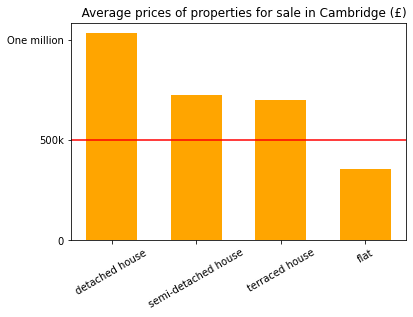

In [40]:
fig, ax = plt.subplots()
ax.bar(grouped['property_type'], grouped['price'], color='orange', width=0.6)
plt.title('   Average prices of properties for sale in Cambridge (£)')
plt.xticks(rotation=30)

# specify the y labels
ax.set_yticks([1000000 , 500000, 0])
ax.set_yticklabels(['One million', '500k', '0'])

# specifying horizontal line type
plt.axhline(y = 500000, color = 'r', linestyle = '-')

plt.show()